In [ ]:
HEART FAILURE RISK PREDICTION PROJECT POC# This script pulls in datasets for patients with Heart Disease from the Cleveland Clinic Foundation, USA collected over time. Objective is on the use of clustering algorithms to group patients into similar groups on basis of their characteristics. 2 different clustering algorithms are used (kmeans and Hierarchical clustering methods. The goal is to support clinicians in provision of more targeted treatments to patients with similar characteristics - who are likely to respond in similar ways to different treatment options.

# Author = 'Dr Adaeze Nwobodo' email = 'AdaezeNwobodo@gmail.com'

# Import library packages {Dplyr, rpart, sigr, ggplot, tidyselect, base, readr, readxl, renv, tibble, tidyr, utils}

In [1]:
LOAD HELPER FUNCTIONS
# 1
load_file <- function(filename) {
    #loads csv into dataframe
    return (read_csv(filename))
}

print(load_file)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:6: unexpected symbol
1: LOAD HELPER
         ^


In [2]:
# 2
clean_data_nofullduplicates <- function(data_frame) {
    #removes rows that contain full duplicates. Keep all non-duplicates
    return(distinct(data_frame, keep_all = TRUE))
}

print(clean_data_nofullduplicates)

function(data_frame) {
    #removes rows that contain full duplicates. Keep all non-duplicates
    return(distinct(data_frame, keep_all = TRUE))
}


In [3]:
# 3
clean_datanopartialduplicates <- function(data_frame) {
    #removes partial duplicates
    return(data_frame %>%
          count(Date) %>%
          filter(n > 1))
}

print(clean_datanopartialduplicates)

function(data_frame) {
    #removes partial duplicates
    return(data_frame %>%
          count(Date) %>%
          filter(n > 1))
}


In [4]:
# 4 
get_levels <- function(data_frame) {
    #checks for levels within dataset
    return(levels(dataframe))
}

print(get_levels)

function(data_frame) {
    #checks for levels within dataset
    return(levels(dataframe))
}


In [5]:
# 5
first_quartile <- function(data_frame) {
    return(quantile(data_frame, 0.25))
}

print(first_quartile)

function(data_frame) {
    return(quantile(data_frame, 0.25))
}


In [6]:
# 6
third_quartile <- function(data_frame) {
    return(quantile(data_frame, 0.75))
}

print(third_quartile)

function(data_frame) {
    return(quantile(data_frame, 0.75))
}


In [7]:
# 7
get_wday_month <- function(data_frame) {
    #obtain separate weekday and month datasets from "Date" column for use as independent variables 
    return(data_frame %>%
          mutate(wday = wday(Date, label = TRUE), month = month(Date, label = TRUE)))
}

print(get_wday_month)

function(data_frame) {
    #obtain separate weekday and month datasets from "Date" column for use as independent variables 
    return(data_frame %>%
          mutate(wday = wday(Date, label = TRUE), month = month(Date, label = TRUE)))
}


In [8]:
# 8
calculate_test_train_split <- function(data_frame) {
    #Split the datasets into training(0.75) & test(0.25) set inputs for models
    return (N <- nrow(data_frame) %>%
           round(N * 0.75) %>%
           gp <- runif(N)) %>%
           train_df <- data_frame[gp < 0.75, ]
           test_df <- data_frame[gp >= 0.75, ]

}

print(calculate_test_train_split)

function(data_frame) {
    #Split the datasets into training(0.75) & test(0.25) set inputs for models
    return (N <- nrow(data_frame) %>%
           round(N * 0.75) %>%
           gp <- runif(N)) %>%
           train_df <- data_frame[gp < 0.75, ]
           test_df <- data_frame[gp >= 0.75, ]

}


In [ ]:
# IMPORT LIBRARIES

In [9]:
#Import Libraries
library(dplyr)
library(ggplot2)
library(tidyr)
install.packages("caret"); library(caret)
library(lubridate)
library(purrr)
library(mgcv)
library(rpart)
install.packages("sigr"); library(sigr)
library(tidyverse)
library(tidyselect)
library(tidymodels)
library(utils)
library(base)
library(broom)
library(cluster)
library(ellipsis)
library(graphics)
library(grDevices)
library(highr)
library(lattice)
library(methods)
library(nlme)
library(readr)
library(readxl)
library(stats)
library(stringr)
install.packages("ranger"); library(ranger)
library(tibble)
install.packages("xgboost"); library(xgboost)
library(randomForest)
library(magrittr)
install.packages("Metrics"); library(Metrics)
install.packages("assertive"); library(assertive)
library(lubridate)
install.packages("xts"); library(xts)
install.packages("hms"); library(hms)

ERROR: Error in library(dplyr): there is no package called ‘dplyr’


In [10]:
install.packages("vtreat"); library(vtreat)
install.packages("chron"); library(chron)
install.packages("data.table"); library(data.table)
install.packages("binr"); library(binr)
install.packages("psych"); library(psych)
install.packages("ggfortify"); library(ggfortify)
install.packages("tibble"); library(tibble)
library(mlbench)
install.packages("tidymodels"); library(tidymodels)
library(rpart) 
library(parsnip)
install.packages("wrapr"); library(wrapr)
library(brotools)
install.packages("rsample"); library(rsample)
install.packages("e1071"); library(e1071)
install.packages("elasticnet"); library(elasticnet)
install.packages("glmnet"); library(glmnet)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: wrapr
Warning message in install.packages("chron"):
“installation of package ‘chron’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


ERROR: Error in library(chron): there is no package called ‘chron’


In [23]:
#Load the CSV file into a data frame 
FramData_df <- read.csv("~/Library/Mobile Documents/com~apple~CloudDocs/Documents/GitHubRprojects/Heart Disease/Data/framingham.csv")

#View First few rows 
head (FramData_df)


male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,39,4,0,0,0,0,0,0,195,106.0,70,26.97,80,77,0
0,46,2,0,0,0,0,0,0,250,121.0,81,28.73,95,76,0
1,48,1,1,20,0,0,0,0,245,127.5,80,25.34,75,70,0
0,61,3,1,30,0,0,1,0,225,150.0,95,28.58,65,103,1
0,46,3,1,23,0,0,0,0,285,130.0,84,23.10,85,85,0
0,43,2,0,0,0,0,1,0,228,180.0,110,30.30,77,99,0


In [29]:
install.packages("lsr"); library(lsr)
install.packages("outliers"); library(outliers)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [34]:
install.packages("remotes")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [37]:
install.packages("devtools")

Warning message:
“dependencies ‘pkgdown’, ‘profvis’, ‘purrr’, ‘cpp11’, ‘waldo’, ‘httr2’ are not available”also installing the dependencies ‘openssl’, ‘zip’, ‘fastmap’, ‘glue’, ‘stringi’, ‘vctrs’, ‘gert’, ‘gh’, ‘rappdirs’, ‘cachem’, ‘commonmark’, ‘stringr’, ‘brio’, ‘callr’, ‘digest’, ‘jsonlite’, ‘magrittr’, ‘processx’, ‘ps’, ‘usethis’, ‘cli’, ‘ellipsis’, ‘fs’, ‘lifecycle’, ‘memoise’, ‘pkgload’, ‘rcmdcheck’, ‘rlang’, ‘roxygen2’, ‘sessioninfo’, ‘testthat’

Warning message in download.file(url, destfile, method, mode = "wb", ...):
“URL 'https://cran.r-project.org/src/contrib/stringi_1.8.4.tar.gz': status was 'Couldn't resolve host name'”

Error in download.file(url, destfile, method, mode = "wb", ...) : 
  cannot open URL 'https://cran.r-project.org/src/contrib/stringi_1.8.4.tar.gz'


Warning message in download.packages(pkgs, destdir = tmpd, available = available, :
“download of package ‘stringi’ failed”Warning message in install.packages("devtools"):
“installation of package ‘openssl’ had non-zero exit status”Warning message in install.packages("devtools"):
“installation of package ‘zip’ had non-zero exit status”Warning message in install.packages("devtools"):
“installation of package ‘fastmap’ had non-zero exit status”Warning message in install.packages("devtools"):
“installation of package ‘glue’ had non-zero exit status”Warning message in install.packages("devtools"):
“installation of package ‘rappdirs’ had non-zero exit status”Warning message in install.packages("devtools"):
“installation of package ‘commonmark’ had non-zero exit status”Warning message in install.packages("devtools"):
“installation of package ‘brio’ had non-zero exit status”Warning message in install.packages("devtools"):
“installation of package ‘digest’ had non-zero exit status”Warning messa

In [38]:
head(FramData_df)
nrow(FramData_df)

male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,39,4,0,0,0,0,0,0,195,106.0,70,26.97,80,77,0
0,46,2,0,0,0,0,0,0,250,121.0,81,28.73,95,76,0
1,48,1,1,20,0,0,0,0,245,127.5,80,25.34,75,70,0
0,61,3,1,30,0,0,1,0,225,150.0,95,28.58,65,103,1
0,46,3,1,23,0,0,0,0,285,130.0,84,23.10,85,85,0
0,43,2,0,0,0,0,1,0,228,180.0,110,30.30,77,99,0


[1] 4240

In [40]:
#Checking data for any missing or null values 

sum(is.na(FramData_df)) #overall missing values
colSums(is.na(FramData_df)) #missing values per column

[1] 645

male             age       education   currentSmoker      cigsPerDay 
              0               0             105               0              29 
         BPMeds prevalentStroke    prevalentHyp        diabetes         totChol 
             53               0               0               0              50 
          sysBP           diaBP             BMI       heartRate         glucose 
              0               0              19               1             388 
     TenYearCHD 
              0

In [41]:
#High level summary of numerical features of FramData dataset

summary(FramData_df)

      male             age          education     currentSmoker   
 Min.   :0.0000   Min.   :32.00   Min.   :1.000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:42.00   1st Qu.:1.000   1st Qu.:0.0000  
 Median :0.0000   Median :49.00   Median :2.000   Median :0.0000  
 Mean   :0.4292   Mean   :49.58   Mean   :1.979   Mean   :0.4941  
 3rd Qu.:1.0000   3rd Qu.:56.00   3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :70.00   Max.   :4.000   Max.   :1.0000  
                                  NA's   :105                     
   cigsPerDay         BPMeds        prevalentStroke     prevalentHyp   
 Min.   : 0.000   Min.   :0.00000   Min.   :0.000000   Min.   :0.0000  
 1st Qu.: 0.000   1st Qu.:0.00000   1st Qu.:0.000000   1st Qu.:0.0000  
 Median : 0.000   Median :0.00000   Median :0.000000   Median :0.0000  
 Mean   : 9.006   Mean   :0.02962   Mean   :0.005896   Mean   :0.3106  
 3rd Qu.:20.000   3rd Qu.:0.00000   3rd Qu.:0.000000   3rd Qu.:1.0000  
 Max.   :70.000   Max.   :1.0000

Summary breakdown - some features listed above are BINARY eg - "Sex", "currentSmoker - whether or not the patient smokes", "prevalentHyp - which implies whether or not the patient has hypertension", "BP meds - which would naturally folllow a diagnosis of hypertension however its mean value is quite different to the "prevalentHyp" column likely because of some missing datasets in "BPMeds" column, "prevalentStroke" which implies the presence or absence of a stroke in each patient. Same for "Diabetes" column which implies its presence or absence in each patient and "TenYearCHD"
The "Age" Column suggests the youngest person in the group was 32 years and the oldest was 70 years
For "Education" column, a 4 tiered categorization system has been used to rank patients into each category
For "cigsPerDay", the number of cigarettes smoked per day ranged from 0(none) to 70 cigarettes
For "totChol" values ranged from 107g/dL at a minimun to 696g/dL at a maximum (unclear what the LDL/HDL ratio is per patient). There were 50 datapoints missing from this column
For "sysBP" column, values ranged from a minimum of 83.5mmHg (which is quite low) and through to a maximum recorded value of "295mmHg" (which is extremely high and the patient would be deemed at imminent risk of a stroke)
For "DiaBP" column, values ranged from a minimum of 48 (again quite low) through to 142.5mmHg (also quite high)
For "BMI" column, values ranged from a minimum of 15.54 (at which the patient would be considered to be severely anorexic) through to a maximum value of 56.80 (which would be considered mobidly obese for the patient)
For "heart rate" column, values ranged from a minimum of 44 (which would be considered bradycardic/low for a patient unless it was the norm for the patient) through to a maximum of 143 (which would be considered tachycardic/high and would require medical assessment and likely intervention)
For "glucose" column, the values ranged from a minimum of 40 through to a maximum of 394



In [42]:
#Check data types 
str(FramData_df)

'data.frame':	4240 obs. of  16 variables:
 $ male           : int  1 0 1 0 0 0 0 0 1 1 ...
 $ age            : int  39 46 48 61 46 43 63 45 52 43 ...
 $ education      : int  4 2 1 3 3 2 1 2 1 1 ...
 $ currentSmoker  : int  0 0 1 1 1 0 0 1 0 1 ...
 $ cigsPerDay     : int  0 0 20 30 23 0 0 20 0 30 ...
 $ BPMeds         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentStroke: int  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentHyp   : int  0 0 0 1 0 1 0 0 1 1 ...
 $ diabetes       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ totChol        : int  195 250 245 225 285 228 205 313 260 225 ...
 $ sysBP          : num  106 121 128 150 130 ...
 $ diaBP          : num  70 81 80 95 84 110 71 71 89 107 ...
 $ BMI            : num  27 28.7 25.3 28.6 23.1 ...
 $ heartRate      : int  80 95 75 65 85 77 60 79 76 93 ...
 $ glucose        : int  77 76 70 103 85 99 85 78 79 88 ...
 $ TenYearCHD     : int  0 0 0 1 0 0 1 0 0 0 ...


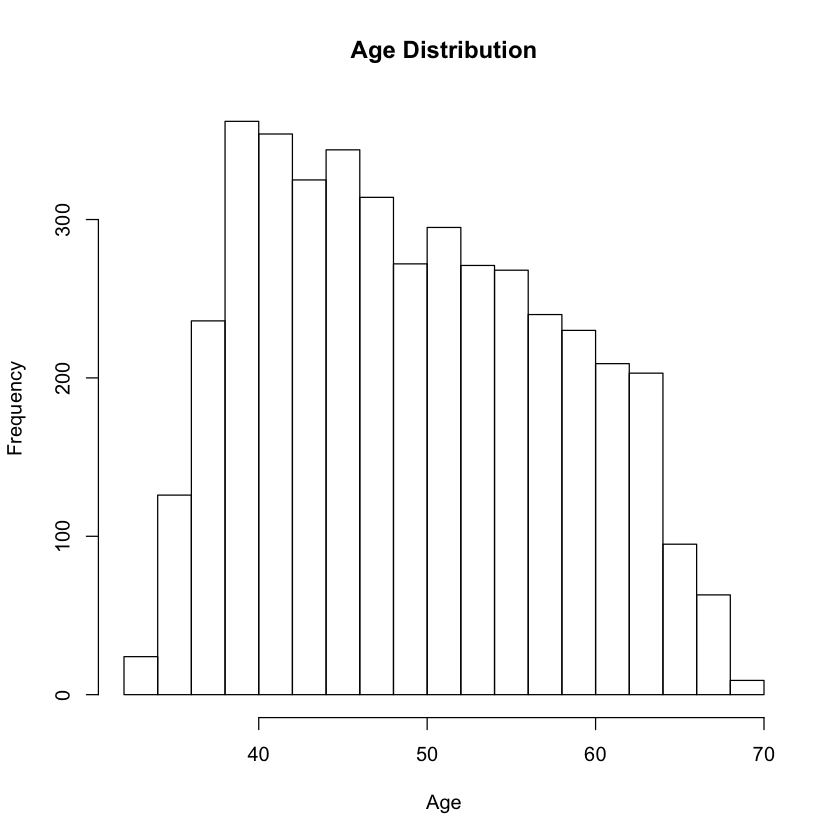

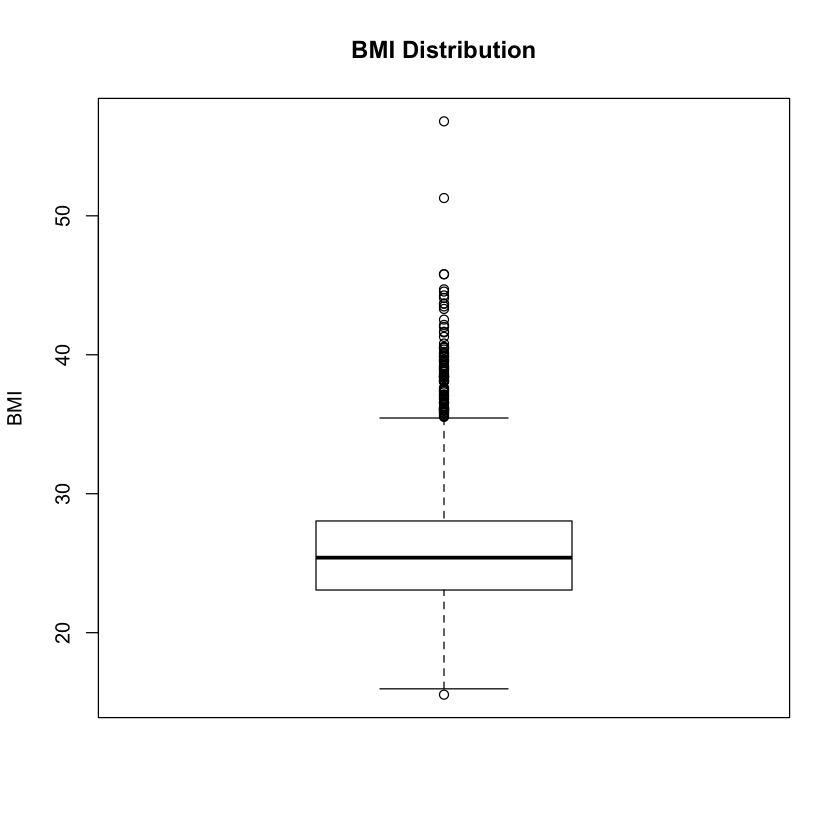

In [44]:
#Univariate analysis - distribution of key features 
#Numerical features 

hist(FramData_df$age, main = "Age Distribution", xlab = "Age")
boxplot(FramData_df$BMI, main = "BMI Distribution", ylab = "BMI")


The graphs above show that the vast majority of patients in the heart disease dataset are aged between 40 and 70 years. With fewer patients in the 70 age bracket. Surprising as incidence of heart disease is known to increase with advancing age.

The boxplot of BMI values suggests a normal, symmetric distribution of the datapoints with the median at the centre of the box (at approx 25) and with both whiskers of approximately equal length. 
Dots above the whiskers indicate outliers >BMI of 35 (potential data entry errors, although some likely due to natural extreme values as well). Single outlier datapoint below the BMI of 15 indicating a patient who likely had/has anorexia

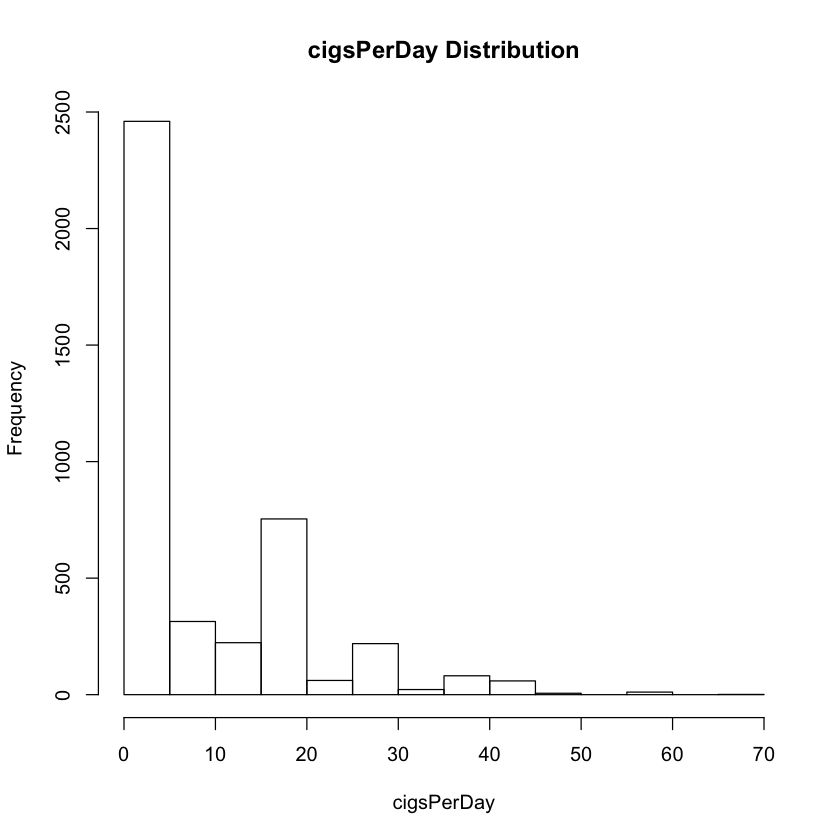

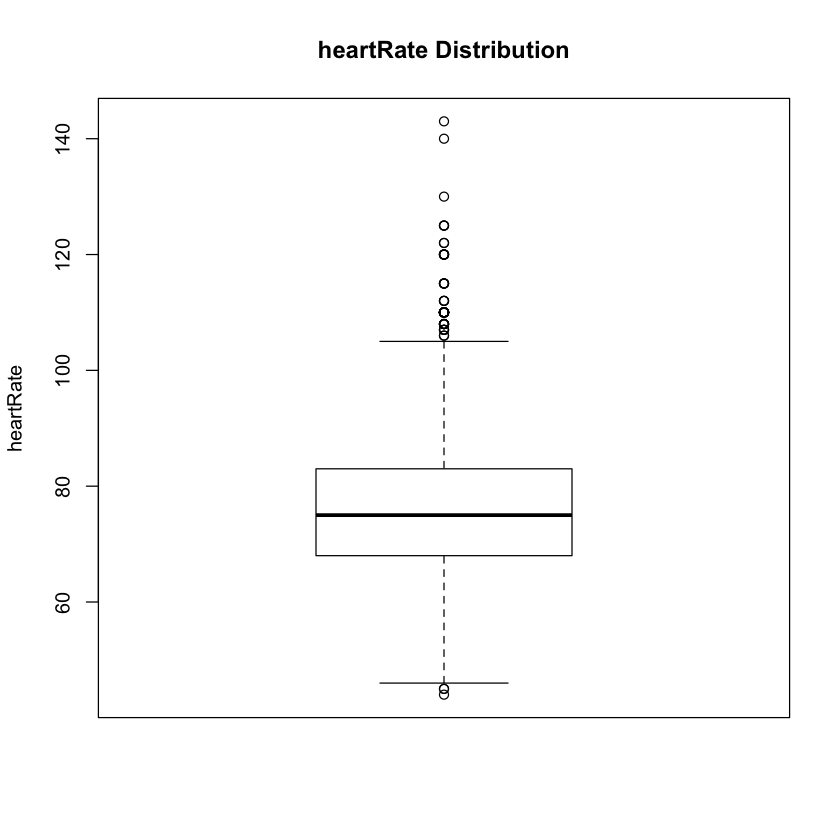

In [46]:
#Univariate analysis - distribution of key features 
#Numerical features 

hist(FramData_df$cigsPerDay, main = "cigsPerDay Distribution", xlab = "cigsPerDay")
boxplot(FramData_df$heartRate, main = "heartRate Distribution", ylab = "heartRate")


Graphs above show that the vast majority of patients don't smoke at all. The next highest frequency of patients is the group that smokes between 15 - 20 cigarettes/day. The range for most patients in this dataset being between 0 - 20 cigarettes/day.

The boxplot of heart rate distribution again appears to show a normal symmetrical distribution to the datapoints, with the median at the centre of the box (at approx 75bpm) and both whiskers of approximately equal length (to encompass heart rate values of approximately 45 bpm through to a max of approx 105bpm. Outliers of 105 - 145 (& below 45)likely due to natural extreme values or data entry point errors.

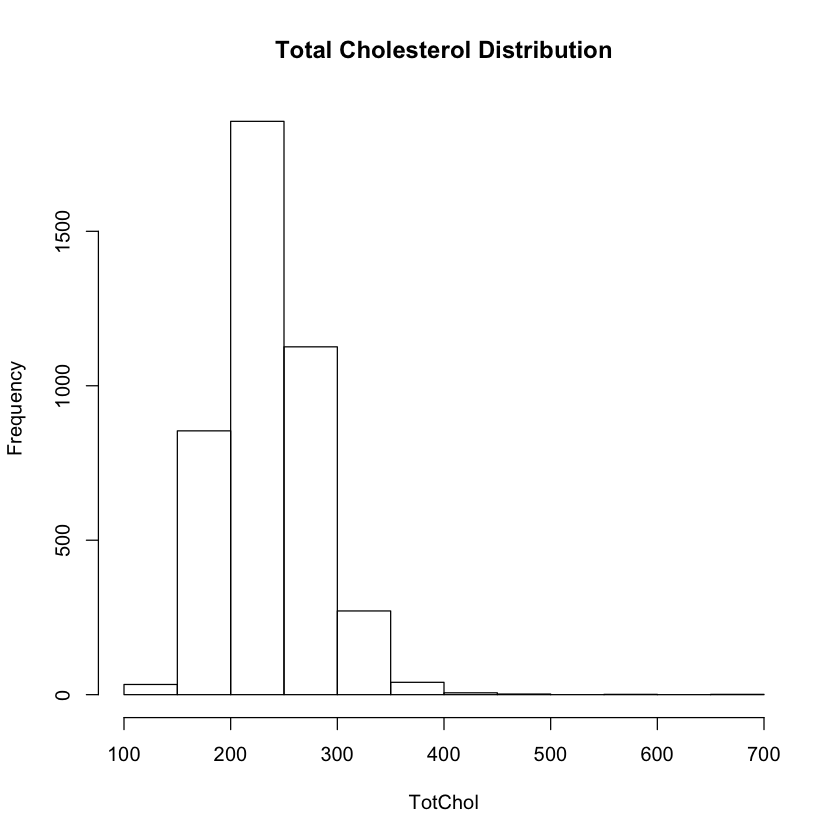

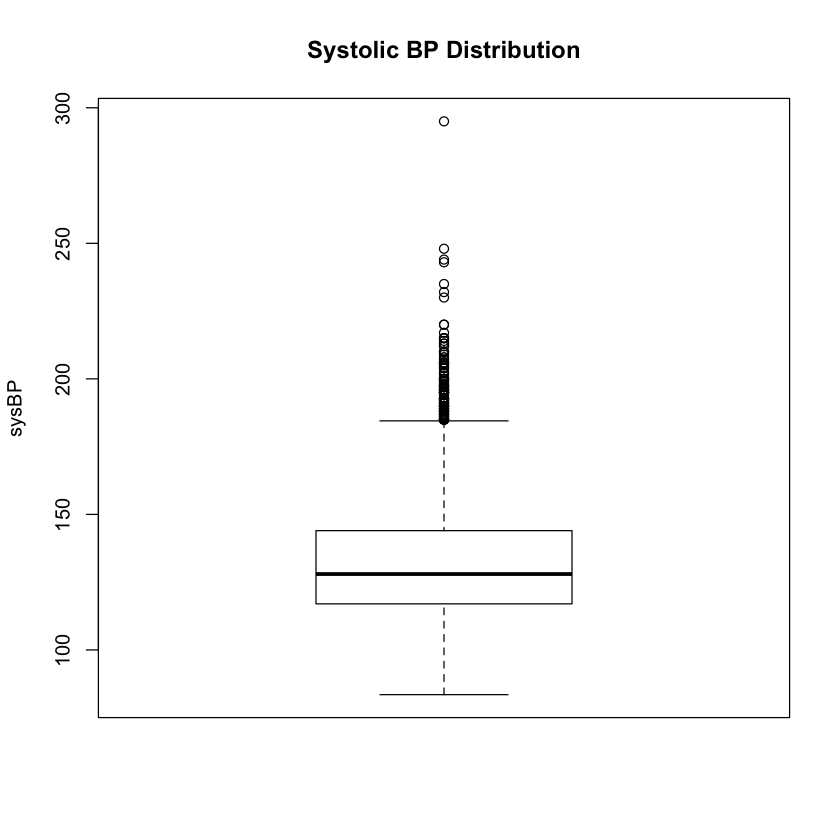

In [47]:
#Univariate analysis - distribution of key features 
#Numerical features 

hist(FramData_df$totChol, main = "Total Cholesterol Distribution", xlab = "TotChol")
boxplot(FramData_df$sysBP, main = "Systolic BP Distribution", ylab = "sysBP")

From the graphs above, the vast majority of patients had cholesterol levels between 150 - 300mg/dL

The boxplot of the systolic BP distribution shows a slight right-sided (positive) skew, with a median systolic BP of approximately 130mmHg. This suggests more patients with high systolic BP values (with a slightly longer right tail)
All the outliers here are present above the right tail value of 190mmHg. Again, conceivable that some of these outliers will be due to natural human extremes while the rest due to data point errors.

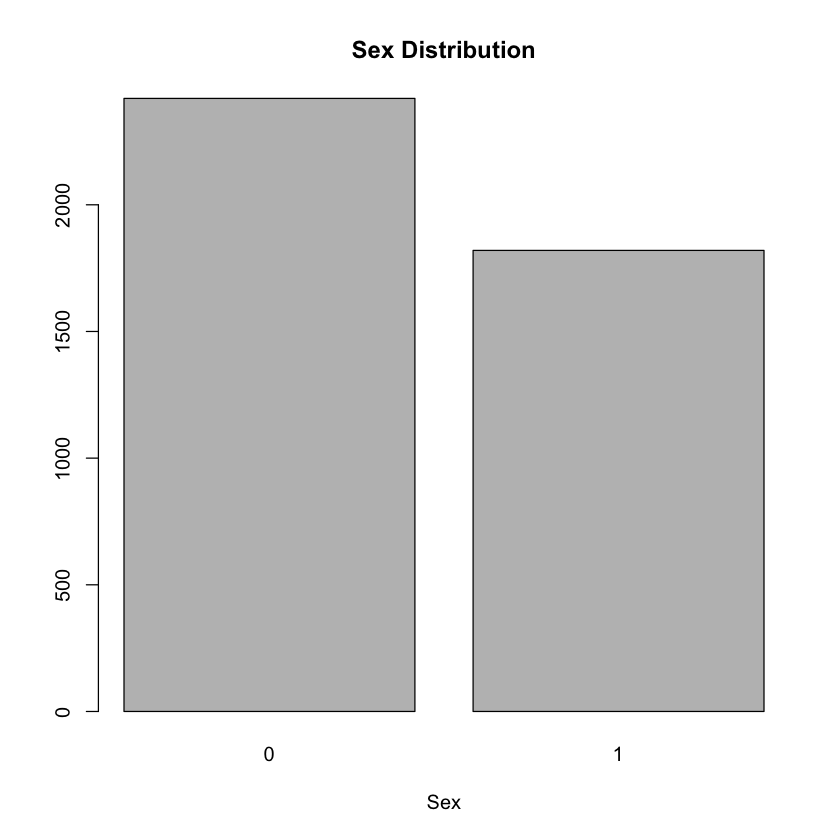

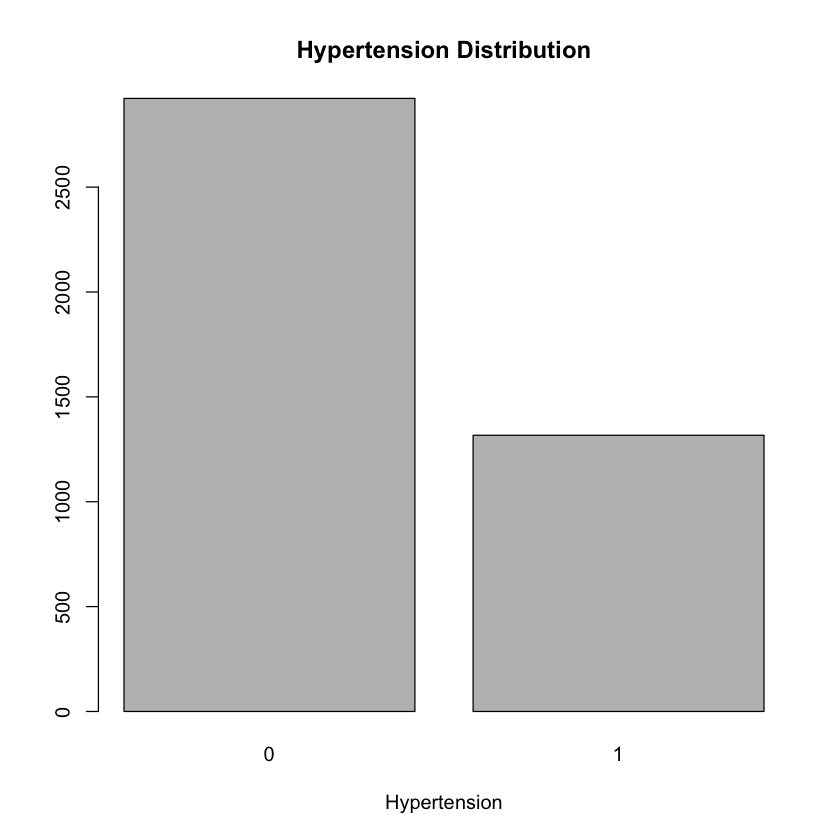

In [49]:
#Univariate analysis - distribution of key features 
#Categorical features 

barplot(table(FramData_df$male), main = "Sex Distribution", xlab = "Sex")
barplot(table(FramData_df$prevalentHyp), main = "Hypertension Distribution", xlab = "Hypertension")
        

In the sex distribution bar chart above, the male sex is represented as a 1 which implies there are more female (0) datapoints than there are from males. 



In the Hypertension distribution chart above, the results show there are twice as many non-hypertensive patients in the dataset as hypertensive patients. 




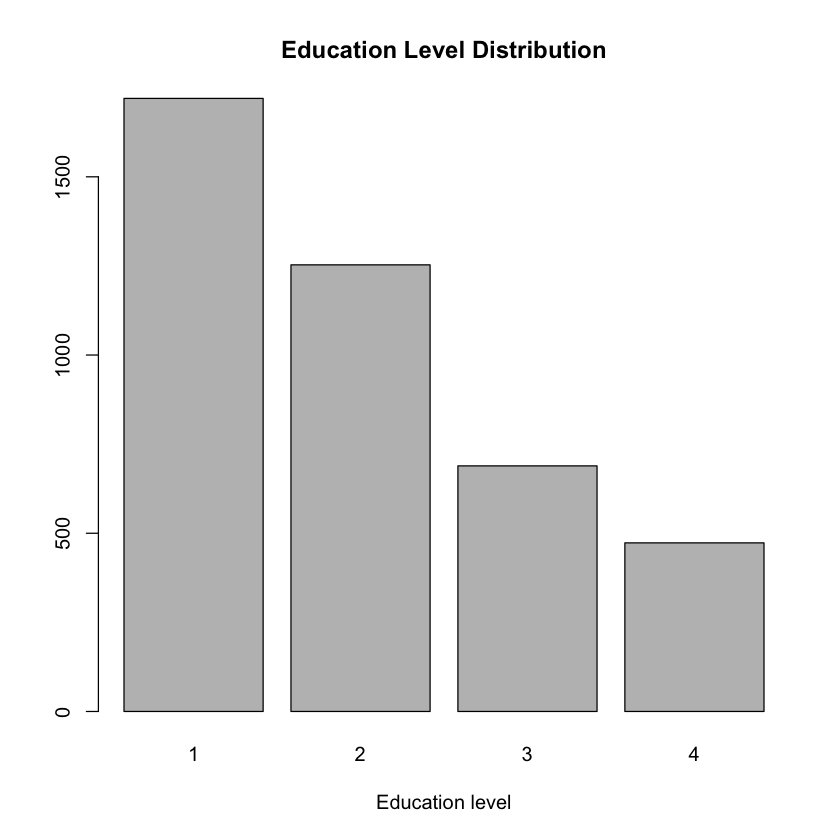

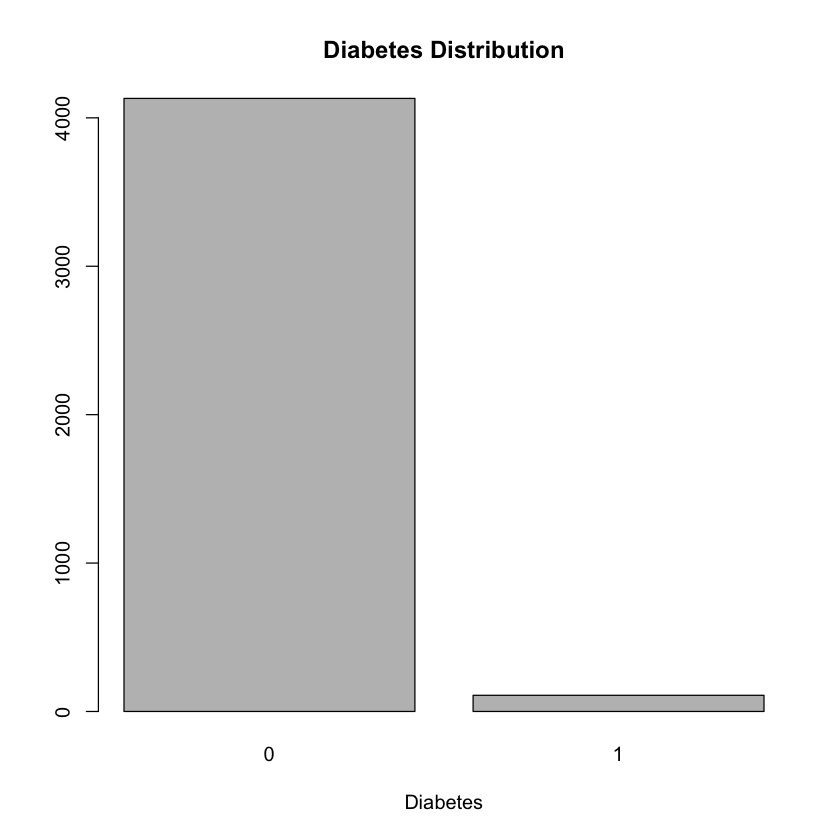

In [50]:
#Univariate analysis - distribution of key features 
#Categorical features

barplot(table(FramData_df$education), main = "Education Level Distribution", xlab = "Education level")
barplot(table(FramData_df$diabetes), main = "Diabetes Distribution", xlab = "Diabetes")


The Education level bar chart shows the number of patients per category decreasing as the education level increases. Also shows 3* as many patient datapoints in Education category level 1 as present in category level 4.

,age,sysBP,BMI,totChol,heartRate
age,1.0000000,0.3940533,NA,NA,NA
sysBP,0.3940533,1.0000000,NA,NA,NA
BMI,NA,NA,1,NA,NA
totChol,NA,NA,NA,1,NA
heartRate,NA,NA,NA,NA,1


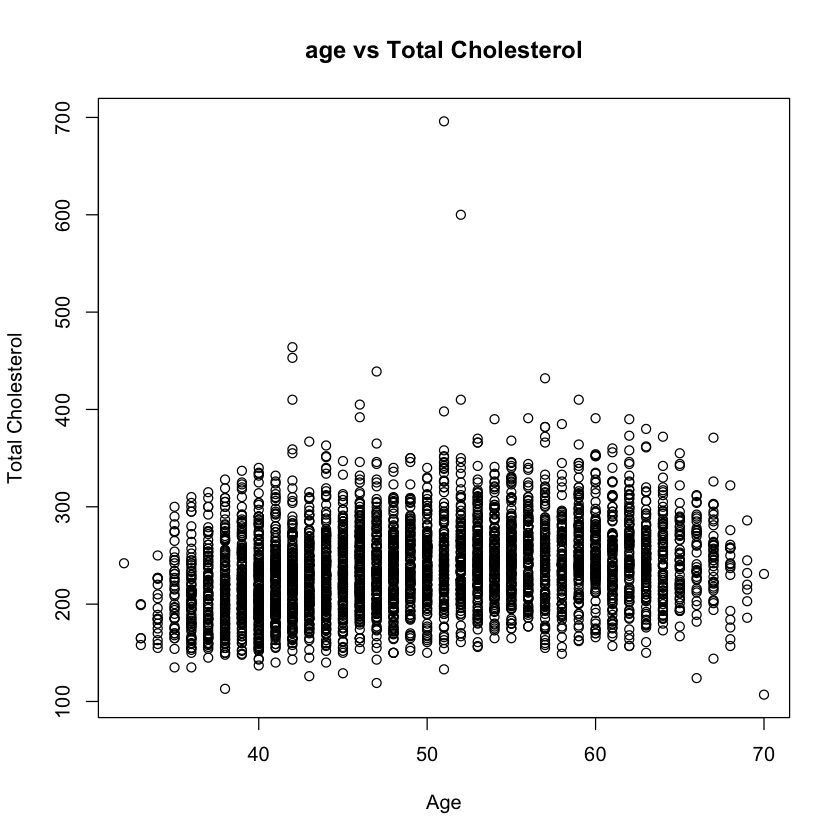

In [55]:
#Bivariate analysis - relationships between numerical variables 

cor(FramData_df[, c("age", "sysBP", "BMI", "totChol", "heartRate")])
plot(FramData_df$age, FramData_df$totChol, main = "age vs Total Cholesterol", xlab = "Age", ylab = "Total Cholesterol")


Although the graph does suggest a slight upward trend in total cholesterol levels with advancing age, this doesn't appear statistically significant (to the visual eye)

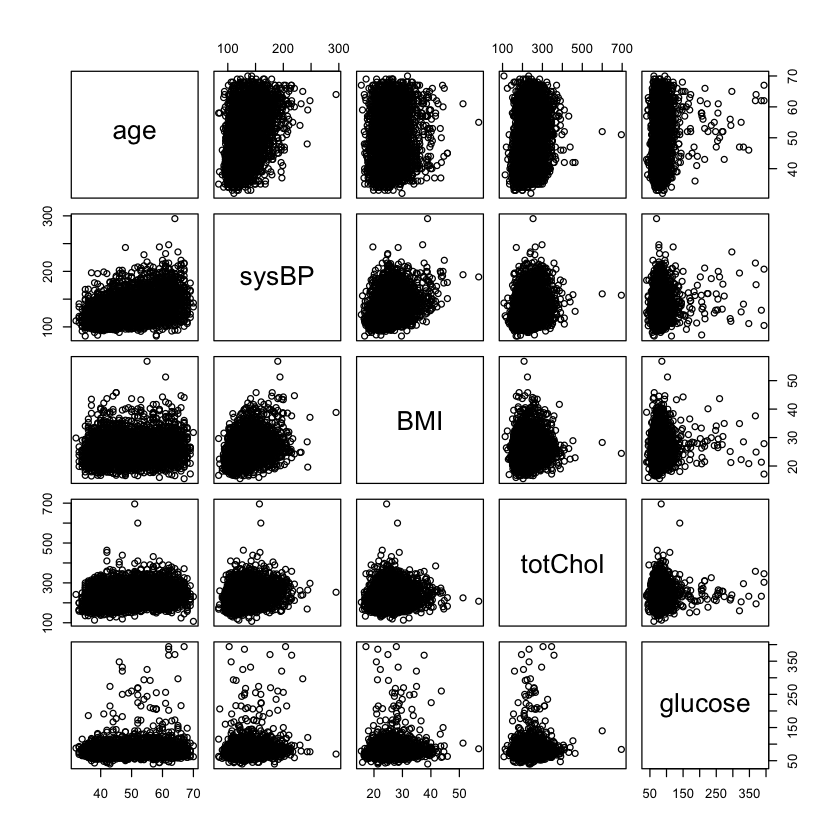

In [56]:
#Multivariate Analysis - exploration of interactions between multiple variables 

pairs(FramData_df[, c("age", "sysBP", "BMI", "totChol", "glucose")])
      

In [60]:
#Feature Importance - importance of the 15 variables in the dataset in predicting outcome

glm_model <- glm(TenYearCHD ~ ., data = FramData_df)

# View summary statistics (p-values, coefficients)
summary(glm_model)



Call:
glm(formula = TenYearCHD ~ ., data = FramData_df)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.73036  -0.18925  -0.10677  -0.01153   1.08033  

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.5762585  0.0789125  -7.303 3.45e-13 ***
male             0.0574246  0.0124715   4.604 4.28e-06 ***
age              0.0070575  0.0007691   9.176  < 2e-16 ***
education       -0.0056161  0.0056705  -0.990 0.322040    
currentSmoker    0.0081070  0.0181548   0.447 0.655226    
cigsPerDay       0.0021636  0.0007827   2.764 0.005733 ** 
BPMeds           0.0459077  0.0346845   1.324 0.185726    
prevalentStroke  0.1368394  0.0753542   1.816 0.069460 .  
prevalentHyp     0.0283079  0.0174492   1.622 0.104825    
diabetes         0.0258235  0.0442138   0.584 0.559217    
totChol          0.0001293  0.0001353   0.956 0.339118    
sysBP            0.0024734  0.0004960   4.987 6.42e-07 ***
diaBP           -0.0011731  0.0008166

Above, a Generalised Linear Model (GLM) was trained to predict Ten Year CHD (coronary heart disease risk) included as the outcome data, using the Framingham dataset. These are the most important conclusions: - 

STRONGLY SIGNIFICANT PREDICTORS (probability < 0.001 or ***)
1. Age (probability < 2e-16) -> older individuals are at higher risk of CHD
2. Male (probability 4.28e-6) -> men have a significantly higher risk
3. Systolic Blood Pressure (probability 6.42e-7) -> the higher the systolic blood pressure, the greater the risk of CHD
4. Glucose (probability 0.000155) -> higher glucose levels are associated with an increased CHD risk

MODERATELY SIGNIFICANT PREDICTORS (0.01 < p < 0.05 or **)
1. Cigarettes per Day (p = 0.0057) -> more cigarettes smoked per day increases CHD risk

MARGINALLY SIGNIFICANT PREDICTORS (0.05 < p < 0.1 or *)
1. Prevalent Stroke (p = 0.069) -> History of a previous stroke might contribute to an increased CHD risk

NON-SIGNIFICANT FACTORS (p > 0.1)
Education, current smoking status, BP medication, diabetes, total cholesterol (which is surprising as specific types of high cholesterol levels are known to positively correlate with an increased risk for heart disease), BMI (also surprising outcome), heart rate, diastolic BP -> none of these contributed significantly to CHD risk IN THIS MODEL.

CONCLUSION
1. Age, male sex, systolic BP levels, glucose levels are smoking were identified as the strongest risk factors
2. Previous stroke history might be important but its effect here was marginal
3. Other factors including cholesterol, BMI, diastolic BP, BP meds etc did not show a strong significance in this model but might still be relevant clinically

TO IMPROVE ON MODEL PERFORMANCE 
1. Handle missing data - as 582 datapoints were missing/deleted - imputing these missing values could potentially improve the model's performance
2. Try other more powerful models - Random Forest, XGBoost might improve on current predictions 

In [62]:
#Target Variable Analysis - checking the data for class imbalance 

table(FramData_df$TenYearCHD)



   0    1 
3596  644 

Ten Year CHD is binary, checked data for class imbalance as if heavily skewed toward one class or other (0 aka no disease or 1 for disease), can impact on model performance. The data is clearly heavily skewed towards class 0 for no disease which could ultimately affect model performance

In [63]:
#Imputation for Missing Data

summary(FramData_df)

      male             age          education     currentSmoker   
 Min.   :0.0000   Min.   :32.00   Min.   :1.000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:42.00   1st Qu.:1.000   1st Qu.:0.0000  
 Median :0.0000   Median :49.00   Median :2.000   Median :0.0000  
 Mean   :0.4292   Mean   :49.58   Mean   :1.979   Mean   :0.4941  
 3rd Qu.:1.0000   3rd Qu.:56.00   3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :70.00   Max.   :4.000   Max.   :1.0000  
                                  NA's   :105                     
   cigsPerDay         BPMeds        prevalentStroke     prevalentHyp   
 Min.   : 0.000   Min.   :0.00000   Min.   :0.000000   Min.   :0.0000  
 1st Qu.: 0.000   1st Qu.:0.00000   1st Qu.:0.000000   1st Qu.:0.0000  
 Median : 0.000   Median :0.00000   Median :0.000000   Median :0.0000  
 Mean   : 9.006   Mean   :0.02962   Mean   :0.005896   Mean   :0.3106  
 3rd Qu.:20.000   3rd Qu.:0.00000   3rd Qu.:0.000000   3rd Qu.:1.0000  
 Max.   :70.000   Max.   :1.0000

Figures above show missing data for the following categories 
1. Education = 105 NA
2. Cigarettes per day = 29 NA
3. BP Meds = 53 NA
4. Total Cholesterol = 50 NA
5. BMI = 19 NA
6. Heart Rate = 1 NA
7. Glucose 388 NA

#For Missing Data Imputation of the Framingham dataset, the "median" value was used for skewed data, the "mean" value used for normal distributed data

and the "mode" was used for the categorical variables


In [64]:
#Missing Data Imputation for Education (Categorical, 105 NA)
#Mode Imputation used to fill missing datapoints with the most frequent category

FramData_df$education[is.na(FramData_df$education)] <- as.numeric(names(sort(table(FramData_df$education), decreasing = TRUE) [1]))


In [66]:
#Missing Data Imputation for Cigarettes per day (Numerical, 29 NA)
#Median Imputation used here as smoking behaviour is often skewed 

FramData_df$cigsPerDay[is.na(FramData_df$cigsPerDay)] <- median(FramData_df$cigsPerDay, na.rm = TRUE)


In [68]:
#Missing Data Imputation for BP Meds (Categorical, 53 NA)
#Mode Imputation used here to fill missing datapoints with most frequent category where "missing" here means the patient is not on BP meds

FramData_df$BPMeds[is.na(FramData_df$BPMeds)] <- 0



In [69]:
#Missing data imputation for Total Cholesterol (Numerical, 50 NA)
#Median Imputation used to fill missing datapoints 

FramData_df$totChol[is.na(FramData_df$totChol)] <- median(FramData_df$totChol, na.rm = TRUE)



In [70]:
#Missing data imputation for BMI (Numerical, 19 NA)
#Mean Imputation used to fill missing datapoints as tyipically a normal distribution is expected here 

FramData_df$BMI[is.na(FramData_df$BMI)] <- mean(FramData_df$BMI, na.rm = TRUE)

                                                  

In [71]:
#Missing data imputation for Heart Rate (Numerical, 1 NA)
#MEan Imputation was used to impute the single missing value here

FramData_df$heartRate[is.na(FramData_df$heartRate)] <- mean(FramData_df$heartRate, na.rm = TRUE)

                                                            

In [82]:
#Missing data imputation for Glucose (Numerical, 388 NA)
#Mean imputation used here

FramData_df$glucose[is.na(FramData_df$glucose)] <- mean(FramData_df$glucose, na.rm = TRUE)


In [83]:
#Printing out a summary of the dataset to confirm there are no longer any missing values

summary(FramData_df)

      male             age          education     currentSmoker   
 Min.   :0.0000   Min.   :32.00   Min.   :1.000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:42.00   1st Qu.:1.000   1st Qu.:0.0000  
 Median :0.0000   Median :49.00   Median :2.000   Median :0.0000  
 Mean   :0.4292   Mean   :49.58   Mean   :1.955   Mean   :0.4941  
 3rd Qu.:1.0000   3rd Qu.:56.00   3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :70.00   Max.   :4.000   Max.   :1.0000  
   cigsPerDay         BPMeds        prevalentStroke     prevalentHyp   
 Min.   : 0.000   Min.   :0.00000   Min.   :0.000000   Min.   :0.0000  
 1st Qu.: 0.000   1st Qu.:0.00000   1st Qu.:0.000000   1st Qu.:0.0000  
 Median : 0.000   Median :0.00000   Median :0.000000   Median :0.0000  
 Mean   : 8.944   Mean   :0.02925   Mean   :0.005896   Mean   :0.3106  
 3rd Qu.:20.000   3rd Qu.:0.00000   3rd Qu.:0.000000   3rd Qu.:1.0000  
 Max.   :70.000   Max.   :1.00000   Max.   :1.000000   Max.   :1.0000  
    diabetes          totCh

In [91]:
#Visualisation of the data
ggplot(FramData_df, aes(x = age, fill = factor(tenYearCHD))) + geom_histogram(binwidth = 5, position = "dodge") + labs(title = "Age Distribution by Heart Disease Status", x = "Age", y = "Count")


ERROR: Error in ggplot(FramData_df, aes(x = age, fill = factor(tenYearCHD))): could not find function "ggplot"


In [90]:
R.version.string

[1] "R version 3.6.1 (2019-07-05)"

In [1]:
getwd()

[1] "/Users/adaezenwobodo/Documents/GitHubRprojects/Heart Disease"